In [1]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from common import get_data_path
from tables_utils import group_by_type

# Import data

In [3]:
hdf = pd.HDFStore(get_data_path('2016_04_16_10k_extended.h5'))
df = hdf.get('DownstreamDebugTuple')
hdf.close()

In [4]:
df = df.drop('seed_z', axis=1)
for col in df.columns:
    if col != 'TT_hits' and col.startswith('TT') or col.startswith('OT') or col.startswith('IT'):
        df = df.drop(col, axis=1)

In [5]:
df.loc[df['seed_class'] == 1, 'seed_class'] = 'IT'
df.loc[df['seed_class'] == 2, 'seed_class'] = 'OT'
df.loc[df['seed_class'] == 3, 'seed_class'] = 'IT/OT'

In [6]:
group_by_type(df)

In [7]:
df.head()

,is_true_track,stored_track_charge,stored_track_chi2PerDoF,stored_track_p,stored_track_pt,track_chi2,track_displX,track_displY,track_errXMag,track_errYMag,...,seed_y,seed_tx,seed_ty,seed_charge,seed_nStates,seed_nNodes,seed_PID,TT_hits,seed_hits,type
0,False,-1.0,0.0,2813.418882,224.920986,4.813538,-22.356223,89.733734,16.057639,34.542863,...,-517.249191,-0.524220,-0.061572,-1,3,0,11.0,4,12,GT/TS
1,True,1.0,0.0,2860.774829,104.954152,0.641020,10.119161,-5.022615,14.293209,29.129699,...,-99.363473,0.480288,-0.009081,1,3,0,-11.0,4,12,TT/TS
2,True,-1.0,0.0,4708.773697,598.412044,0.444495,4.222189,0.077200,8.363078,13.041752,...,-196.064807,-0.382802,-0.025975,-1,3,0,-2212.0,4,12,TT/TS
3,False,-1.0,0.0,2272.888309,110.372386,1.878962,-5.948619,49.530041,19.860208,46.868273,...,-106.608282,-0.550439,-0.015740,-1,3,0,11.0,4,12,GT/TS
4,True,1.0,0.0,3066.207537,425.192025,0.556747,13.956091,-1.886976,13.388854,26.446259,...,-1066.157189,0.423905,-0.122942,1,3,0,2212.0,4,12,TT/TS


## Correlation matrix

In [8]:
corr = df.corr()

Generate mask for the upper triangle

In [9]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

<IPython.core.display.Javascript object>


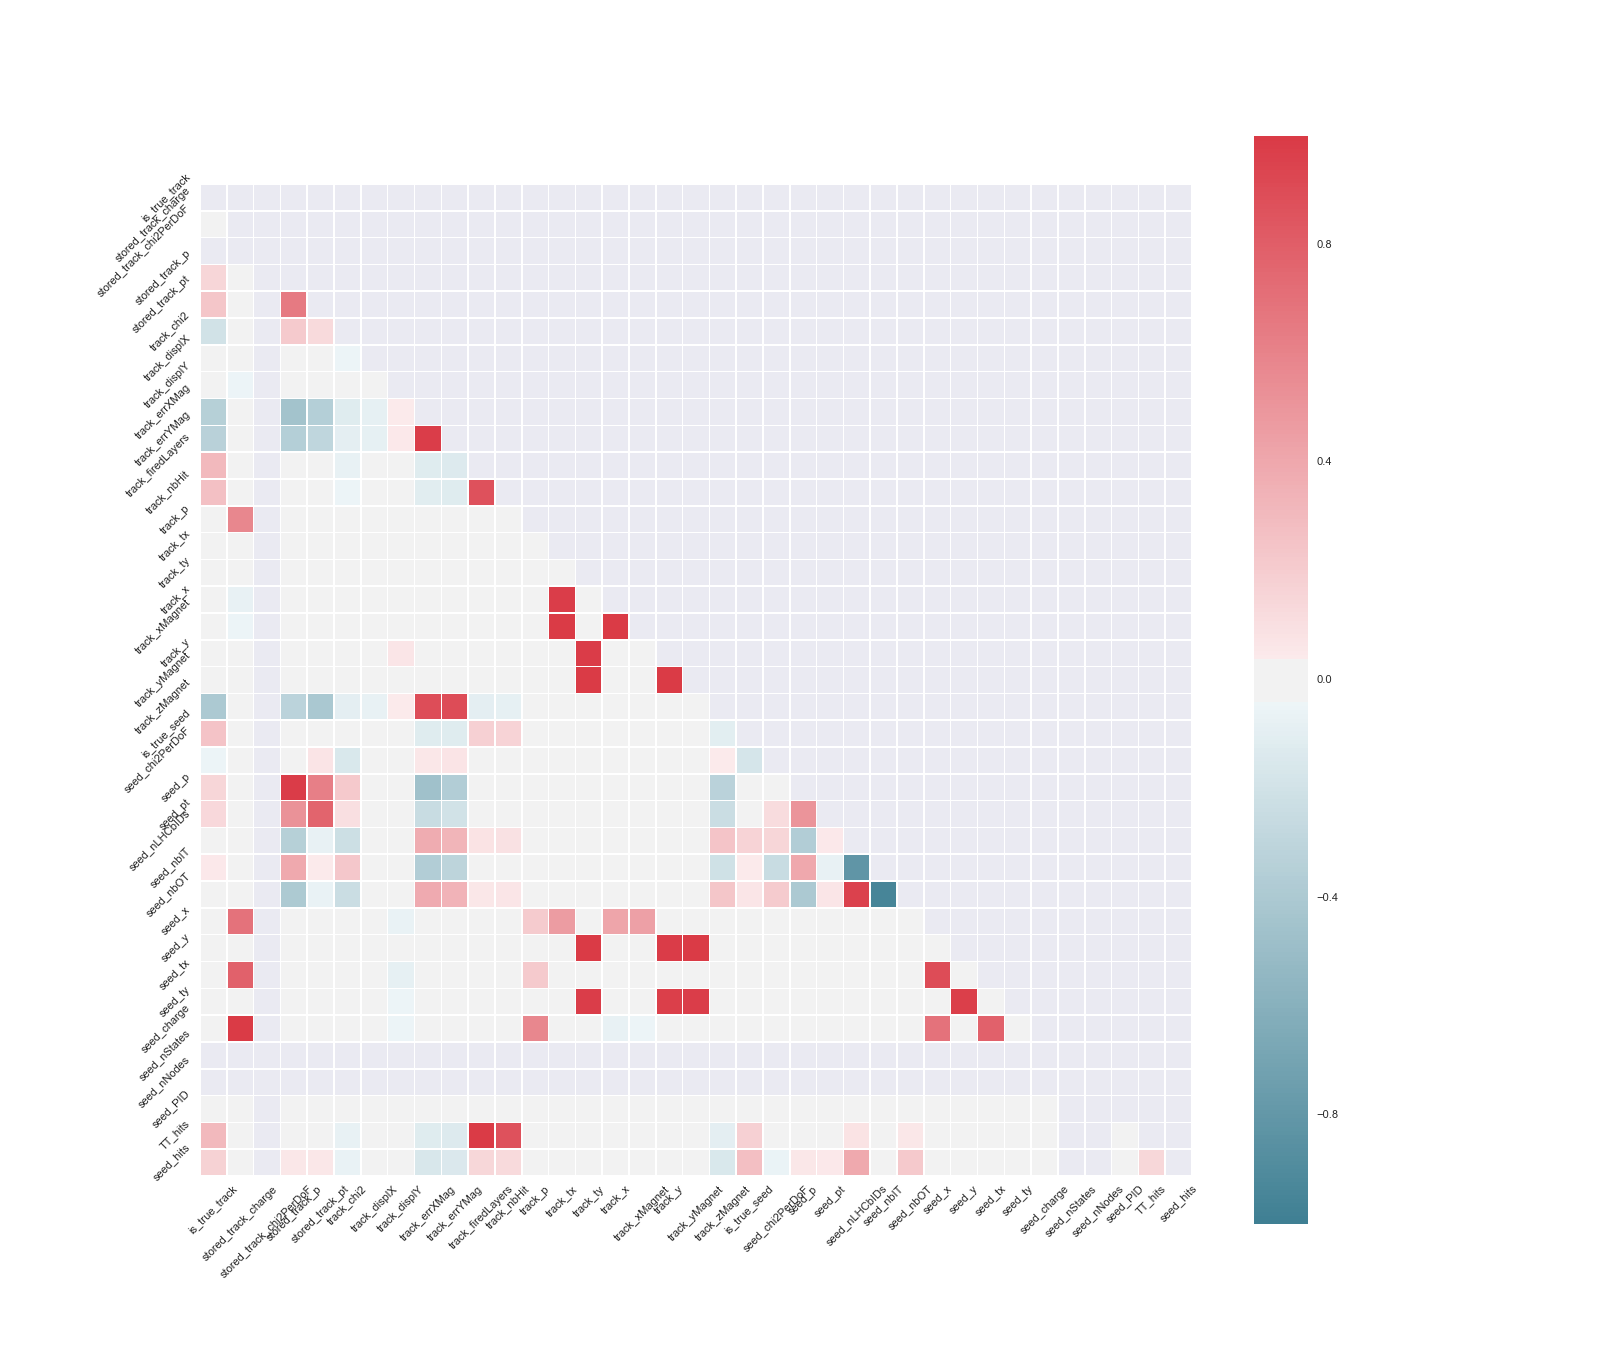

In [10]:
fig, ax = plt.subplots(figsize=(20, 17))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45)
fig.savefig('correlations.pdf')
fig.savefig('correlations.png')

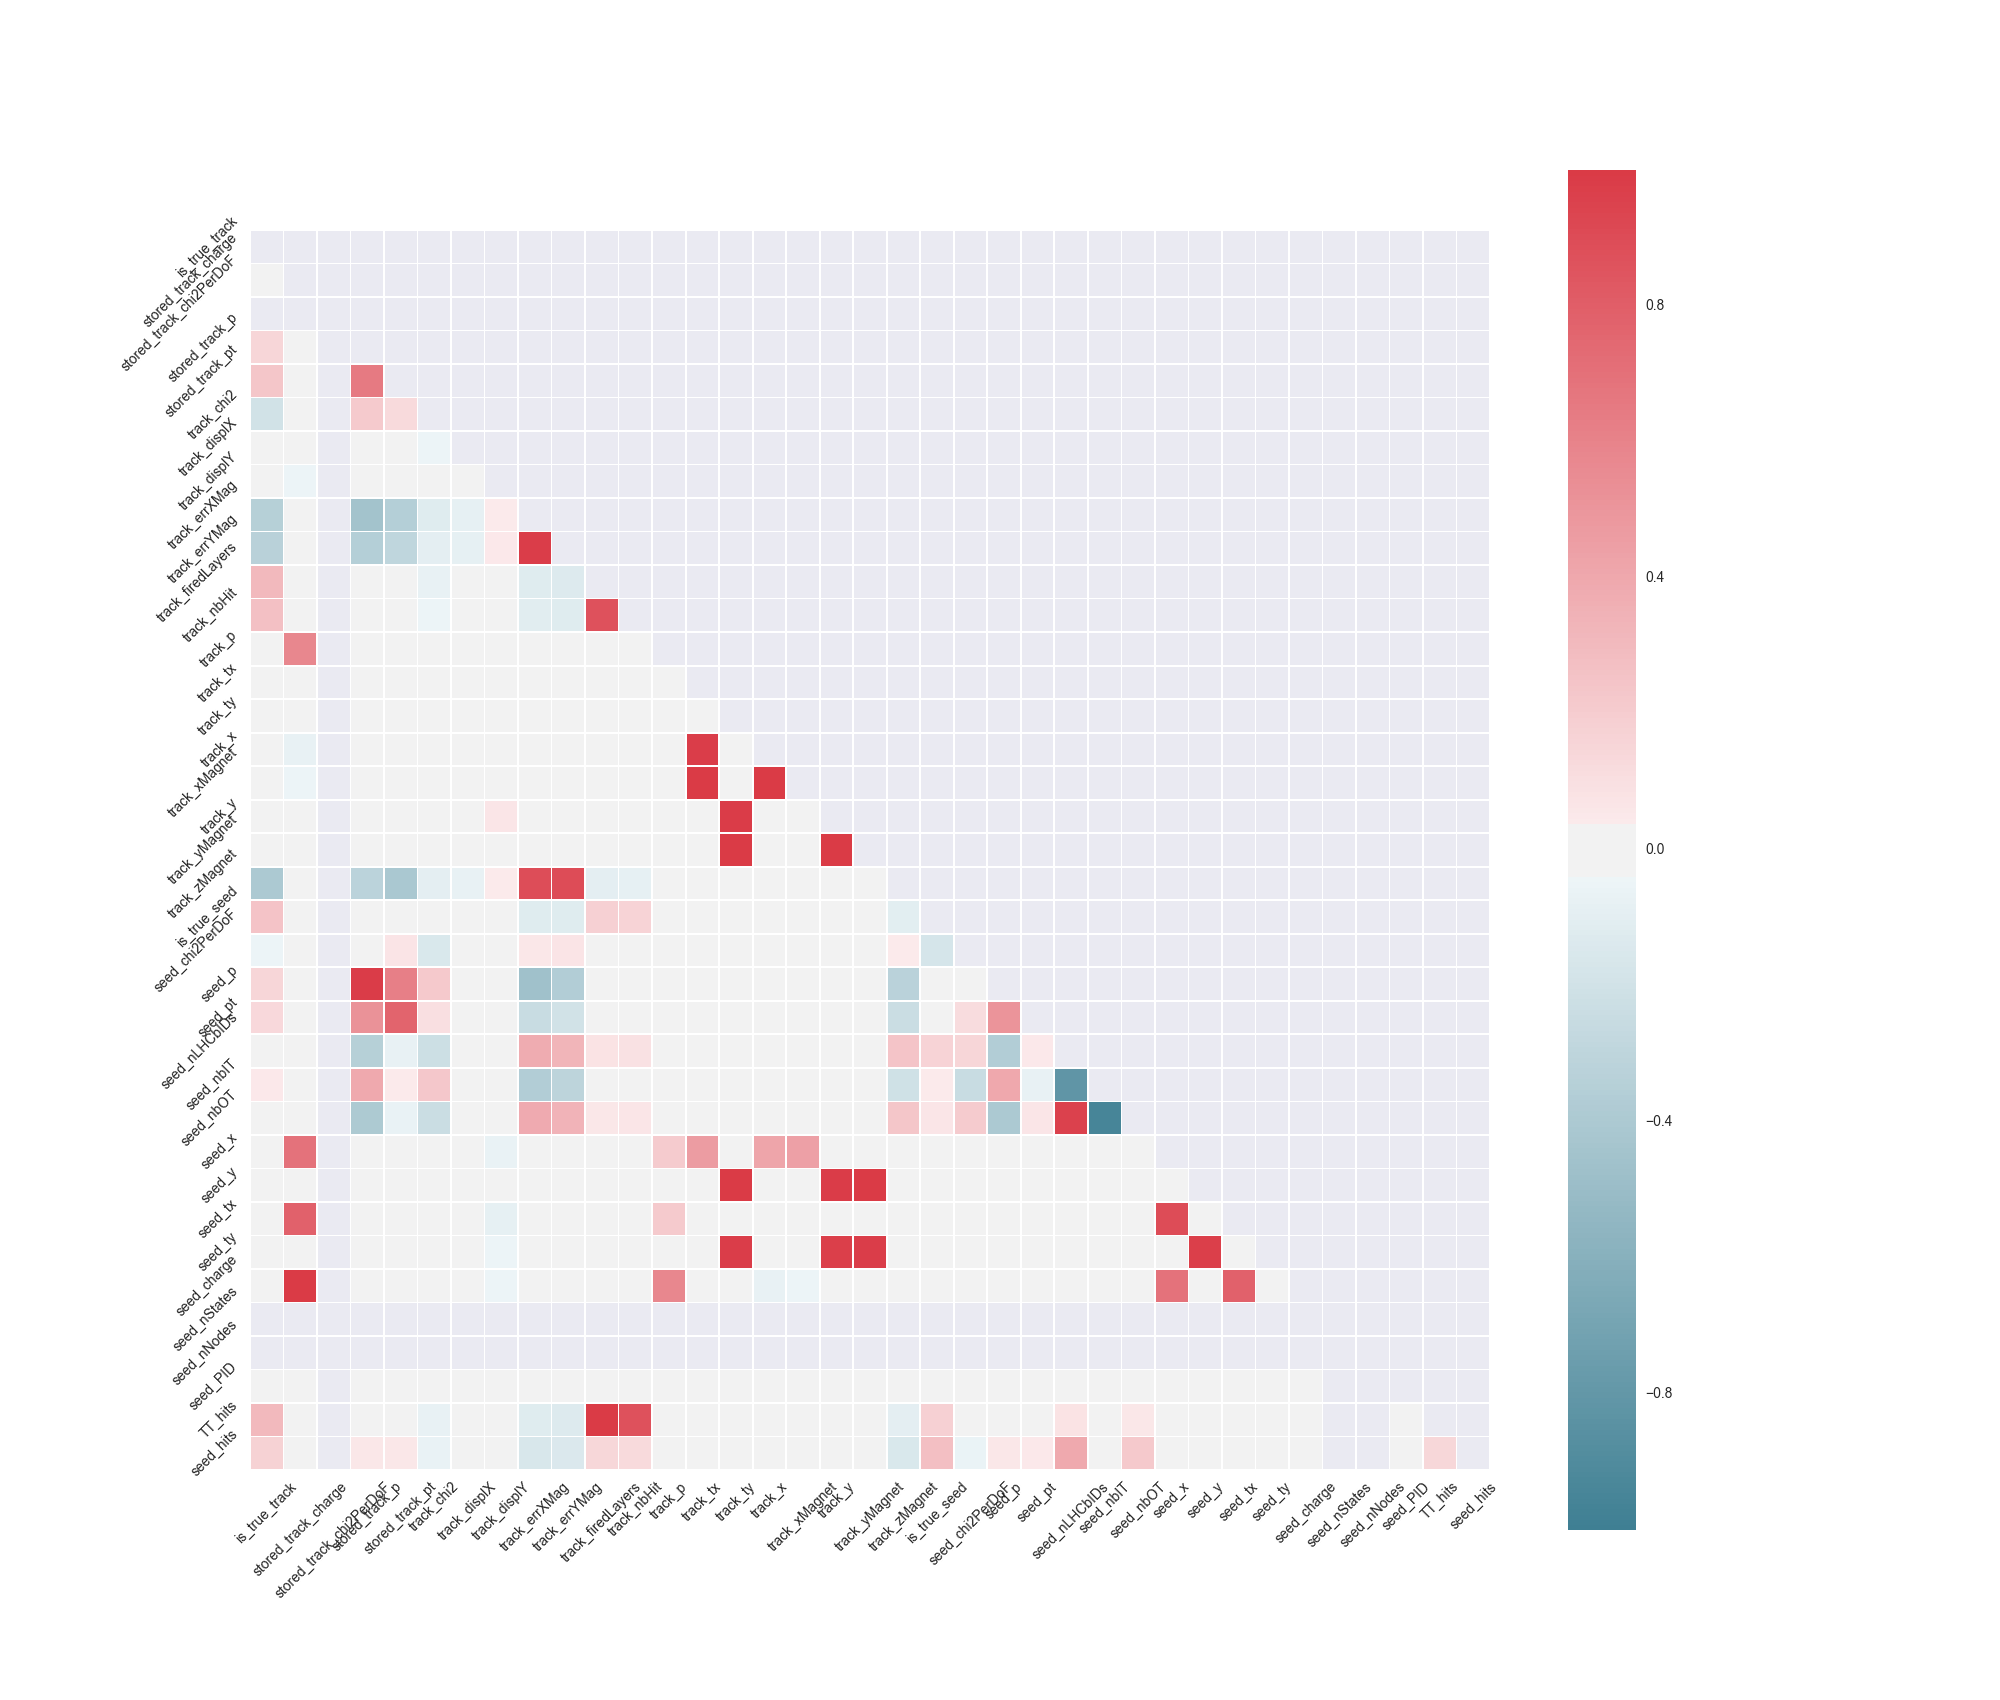

In [11]:
from IPython.display import Image
Image('correlations.png')

In [12]:
df.groupby('seed_class').size()

seed_class
IT        50276
IT/OT     13143
OT       312987
dtype: int64

In [13]:
def pairplot(vars):
    sns.pairplot(df, hue='type', vars=vars, plot_kws={'alpha': 0.5, 'marker': '.'}, hue_order=['GT/GS', 'GT/TS', 'TT/TS'])

<IPython.core.display.Javascript object>


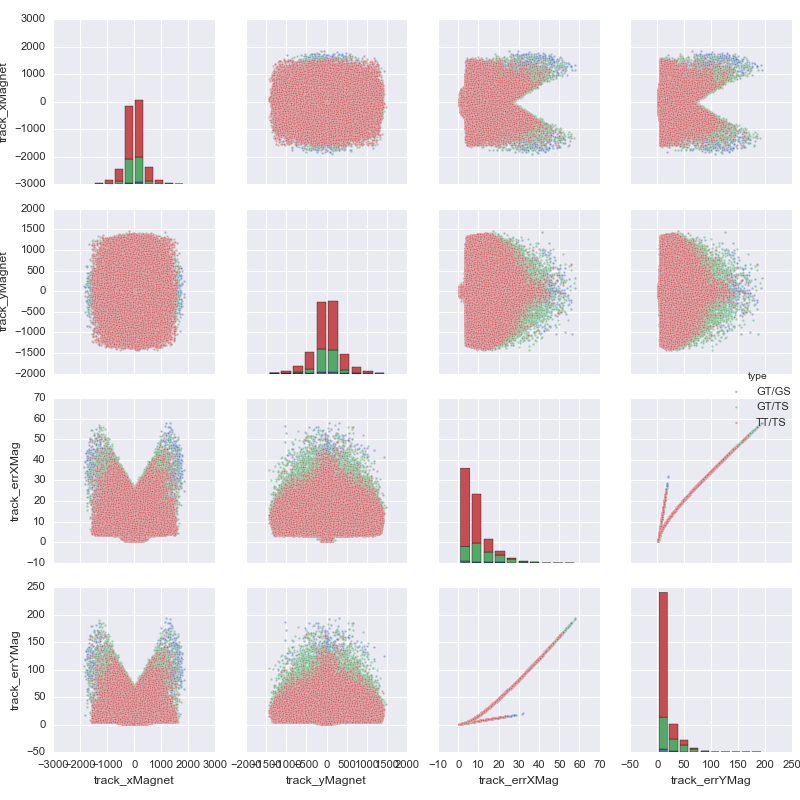

In [14]:
pairplot(['track_xMagnet', 'track_yMagnet', 'track_errXMag', 'track_errYMag'])

## Custom pairplot

In [15]:
groups = df.groupby('type')
def custom_pairplot(x, y):
    fig, ax = plt.subplots()
    sizes = [6, 4, 3]
    for i, (name, group) in enumerate(groups):
        ax.plot(group[x], group[y], marker='o', linestyle='', label=name, markersize=sizes[i])

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.legend()

<IPython.core.display.Javascript object>


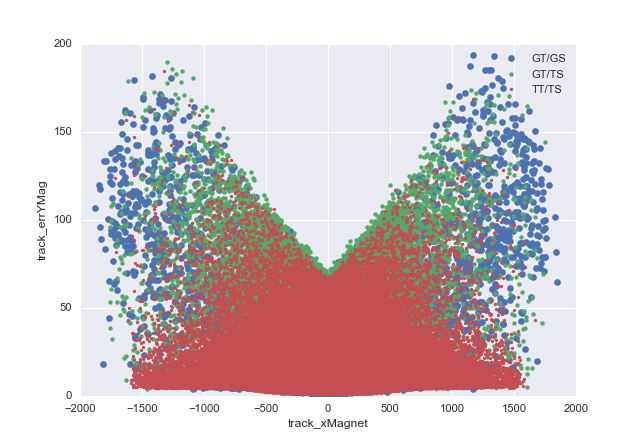

In [16]:
custom_pairplot('track_xMagnet', 'track_errYMag')